In [1]:
import sys
import os
import pandas as pd

# Add the project root to the Python path
sys.path.append(os.path.join(os.getcwd(), '..'))

# Import the project modules
from src.config import config, setup_logging
from src.extract import fetch_statsbomb_event_data
from src.viz import create_gk_distribution_plot
from src.transform import transform_to_goal_kick_events
from src.stats import calculate_gk_stats

# Init logging
logger = setup_logging(log_file="../logs/statsbomb_data.log")

In [2]:
events = fetch_statsbomb_event_data()

2025-10-01 22:55:06,713 - src.extract.statsbomb_data - INFO - Fetching StatsBomb event data for Europe - UEFA Euro - 2024 - male
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: No

In [3]:
list(events.columns)

['50_50',
 'bad_behaviour_card',
 'ball_receipt_outcome',
 'ball_recovery_offensive',
 'ball_recovery_recovery_failure',
 'block_deflection',
 'block_offensive',
 'block_save_block',
 'carry_end_location',
 'clearance_aerial_won',
 'clearance_body_part',
 'clearance_head',
 'clearance_left_foot',
 'clearance_other',
 'clearance_right_foot',
 'counterpress',
 'dribble_no_touch',
 'dribble_nutmeg',
 'dribble_outcome',
 'dribble_overrun',
 'duel_outcome',
 'duel_type',
 'duration',
 'foul_committed_advantage',
 'foul_committed_card',
 'foul_committed_offensive',
 'foul_committed_penalty',
 'foul_committed_type',
 'foul_won_advantage',
 'foul_won_defensive',
 'foul_won_penalty',
 'goalkeeper_body_part',
 'goalkeeper_end_location',
 'goalkeeper_outcome',
 'goalkeeper_penalty_saved_to_post',
 'goalkeeper_position',
 'goalkeeper_punched_out',
 'goalkeeper_shot_saved_off_target',
 'goalkeeper_shot_saved_to_post',
 'goalkeeper_success_in_play',
 'goalkeeper_technique',
 'goalkeeper_type',
 'id'

In [4]:
# Get all build up events for Spain
build_up_cols = [
    # "id", 
    "match_id", "timestamp", 
    # "minute", "second", 
    "team", "type", "player", "position", 
    "play_pattern", "possession",
    "location", "ball_receipt_outcome",
    "carry_end_location", "dribble_outcome",
    "duel_type", "duel_outcome", "interception_outcome",
    "pass_type", "pass_end_location", "pass_recipient", "pass_outcome", "pass_length",
]

build_up_events = events[
    (events["team"] == "Spain") & 
    (events["play_pattern"] == "From Goal Kick") 
    & (events["type"] != "Half Start")
][build_up_cols]

build_up_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1151 entries, 1399 to 187788
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   match_id              1151 non-null   int64  
 1   timestamp             1151 non-null   object 
 2   team                  1151 non-null   object 
 3   type                  1151 non-null   object 
 4   player                1146 non-null   object 
 5   position              1146 non-null   object 
 6   play_pattern          1151 non-null   object 
 7   possession            1151 non-null   int64  
 8   location              1143 non-null   object 
 9   ball_receipt_outcome  45 non-null     object 
 10  carry_end_location    248 non-null    object 
 11  dribble_outcome       4 non-null      object 
 12  duel_type             24 non-null     object 
 13  duel_outcome          6 non-null      object 
 14  interception_outcome  2 non-null      object 
 15  pass_type            

In [5]:
build_up_events.head()

,match_id,timestamp,team,type,player,position,play_pattern,possession,location,ball_receipt_outcome,carry_end_location,dribble_outcome,duel_type,duel_outcome,interception_outcome,pass_type,pass_end_location,pass_recipient,pass_outcome,pass_length
1399,3943043,00:00:34.440,Spain,Pass,Unai Simón Mendibil,Goalkeeper,From Goal Kick,3,"[6.9, 39.6]",NaN,NaN,NaN,NaN,NaN,NaN,Goal Kick,"[9.1, 57.2]",Robin Aime Robert Le Normand,NaN,17.736967
1400,3943043,00:00:36.279,Spain,Pass,Robin Aime Robert Le Normand,Right Center Back,From Goal Kick,3,"[8.9, 57.2]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[20.6, 75.8]",Daniel Carvajal Ramos,NaN,21.973848
1401,3943043,00:00:39.436,Spain,Pass,Daniel Carvajal Ramos,Right Back,From Goal Kick,3,"[28.6, 76.4]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[50.2, 68.5]",Daniel Olmo Carvajal,NaN,22.999348
1402,3943043,00:00:41.878,Spain,Pass,Álvaro Borja Morata Martín,Center Forward,From Goal Kick,3,"[61.9, 67.1]",NaN,NaN,NaN,NaN,NaN,NaN,Recovery,"[65.1, 66.9]",Lamine Yamal Nasraoui Ebana,Incomplete,3.206244
1935,3943043,00:05:13.283,Spain,Pass,Unai Simón Mendibil,Goalkeeper,From Goal Kick,88,"[5.4, 39.5]",NaN,NaN,NaN,NaN,NaN,NaN,Goal Kick,"[5.9, 58.5]",Robin Aime Robert Le Normand,NaN,19.006578


In [6]:
# Inspect a possession chain
example_chain = build_up_events[(build_up_events["match_id"] == 3943043) & (build_up_events["possession"] == 3)]
example_chain.head(20)

,match_id,timestamp,team,type,player,position,play_pattern,possession,location,ball_receipt_outcome,carry_end_location,dribble_outcome,duel_type,duel_outcome,interception_outcome,pass_type,pass_end_location,pass_recipient,pass_outcome,pass_length
1399,3943043,00:00:34.440,Spain,Pass,Unai Simón Mendibil,Goalkeeper,From Goal Kick,3,"[6.9, 39.6]",NaN,NaN,NaN,NaN,NaN,NaN,Goal Kick,"[9.1, 57.2]",Robin Aime Robert Le Normand,NaN,17.736967
1400,3943043,00:00:36.279,Spain,Pass,Robin Aime Robert Le Normand,Right Center Back,From Goal Kick,3,"[8.9, 57.2]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[20.6, 75.8]",Daniel Carvajal Ramos,NaN,21.973848
1401,3943043,00:00:39.436,Spain,Pass,Daniel Carvajal Ramos,Right Back,From Goal Kick,3,"[28.6, 76.4]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[50.2, 68.5]",Daniel Olmo Carvajal,NaN,22.999348
1402,3943043,00:00:41.878,Spain,Pass,Álvaro Borja Morata Martín,Center Forward,From Goal Kick,3,"[61.9, 67.1]",NaN,NaN,NaN,NaN,NaN,NaN,Recovery,"[65.1, 66.9]",Lamine Yamal Nasraoui Ebana,Incomplete,3.206244
55244,3943043,00:00:35.658,Spain,Ball Receipt*,Robin Aime Robert Le Normand,Right Center Back,From Goal Kick,3,"[9.1, 57.2]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55245,3943043,00:00:37.670,Spain,Ball Receipt*,Daniel Carvajal Ramos,Right Back,From Goal Kick,3,"[20.6, 75.8]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55246,3943043,00:00:40.513,Spain,Ball Receipt*,Daniel Olmo Carvajal,Center Attacking Midfield,From Goal Kick,3,"[50.2, 68.5]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55247,3943043,00:00:42.143,Spain,Ball Receipt*,Lamine Yamal Nasraoui Ebana,Right Wing,From Goal Kick,3,"[68.3, 77.3]",Incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106751,3943043,00:00:35.658,Spain,Carry,Robin Aime Robert Le Normand,Right Center Back,From Goal Kick,3,"[9.1, 57.2]",NaN,"[8.9, 57.2]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106752,3943043,00:00:37.670,Spain,Carry,Daniel Carvajal Ramos,Right Back,From Goal Kick,3,"[20.6, 75.8]",NaN,"[28.6, 76.4]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
gk_events = transform_to_goal_kick_events(events)
gk_events_spain = gk_events[gk_events["team"] == "Spain"]

In [8]:
# Calculate statistics
gk_stats = calculate_gk_stats(gk_events)

In [ ]:
gk_stats.head(25)

,team,total_passes,short_percentage,long_percentage,short_passes,completed_short_passes,incomplete_short_passes,completed_short_percentage,incomplete_short_percentage,long_passes,completed_long_passes,incomplete_long_passes,completed_long_percentage,incomplete_long_percentage
0,England,52,29,71,15,15,0,100,0,37,21,16,57,43
1,Netherlands,40,70,30,28,28,0,100,0,12,6,6,50,50
2,Spain,51,49,51,25,25,0,100,0,26,10,16,38,62
3,France,35,77,23,27,26,1,96,4,8,5,3,62,38
4,Turkey,41,46,54,19,19,0,100,0,22,10,12,45,55
5,Portugal,35,66,34,23,23,0,100,0,12,9,3,75,25
6,Austria,25,76,24,19,19,0,100,0,6,2,4,33,67
7,Denmark,28,39,61,11,11,0,100,0,17,13,4,76,24
8,Switzerland,33,61,39,20,20,0,100,0,13,4,9,31,69
9,Germany,21,67,33,14,14,0,100,0,7,5,2,71,29


2025-10-01 22:55:19,934 - src.viz.gk_distribution - INFO - Creating goal kick distribution plot!


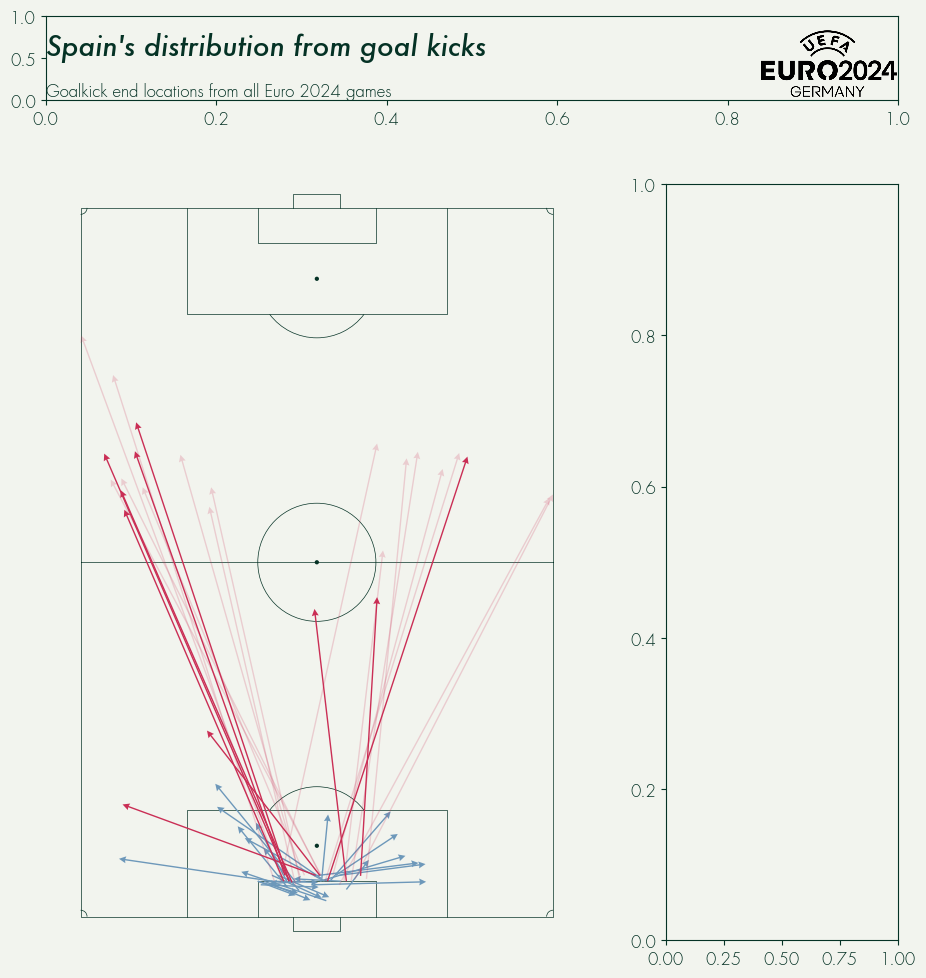

In [ ]:
fig = create_gk_distribution_plot("Spain", gk_events, gk_stats)